In [104]:
'''using RSQUARED to evalute the model ,'''
#importing libs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [105]:
#reading data 
car=pd.read_csv('f:\Automobile_data.csv',na_values=['/','?'])

In [106]:
#data information 
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [107]:
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [108]:
#getting the mean for every numerical coulmns in data 
mean=car.mean()
mean.round(2)

symboling                0.83
normalized-losses      122.00
wheel-base              98.76
length                 174.05
width                   65.91
height                  53.72
curb-weight           2555.57
engine-size            126.91
bore                     3.33
stroke                   3.26
compression-ratio       10.14
horsepower             104.26
peak-rpm              5125.37
city-mpg                25.22
highway-mpg             30.75
price                13207.13
dtype: float64

In [109]:
newcardf=car.fillna(mean)
newcardf.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [110]:
newcardf['num-of-doors'].isnull().sum()

2

In [111]:
newcardf['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [112]:
newcardf[newcardf['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [113]:
sedan = newcardf[newcardf['body-style']=='sedan']
sedan.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0


In [114]:
sedan['num-of-doors'].mode()

0    four
dtype: object

In [115]:
newcardf['num-of-doors'].mode()

0    four
dtype: object

In [116]:
newcardf['num-of-doors']=newcardf['num-of-doors'].fillna('four')

In [117]:
newcardf.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [118]:
newcardf['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [119]:
newcardf['num-of-doors']=newcardf['num-of-doors'].replace({'two':2,'four':4})
newcardf['num-of-cylinders'].unique()

newcardf['num-of-cylinders']=newcardf['num-of-cylinders'].replace({'four':4,'six':6,'five':5,'twelve':12,'two':2,'eight':8,'three':3})

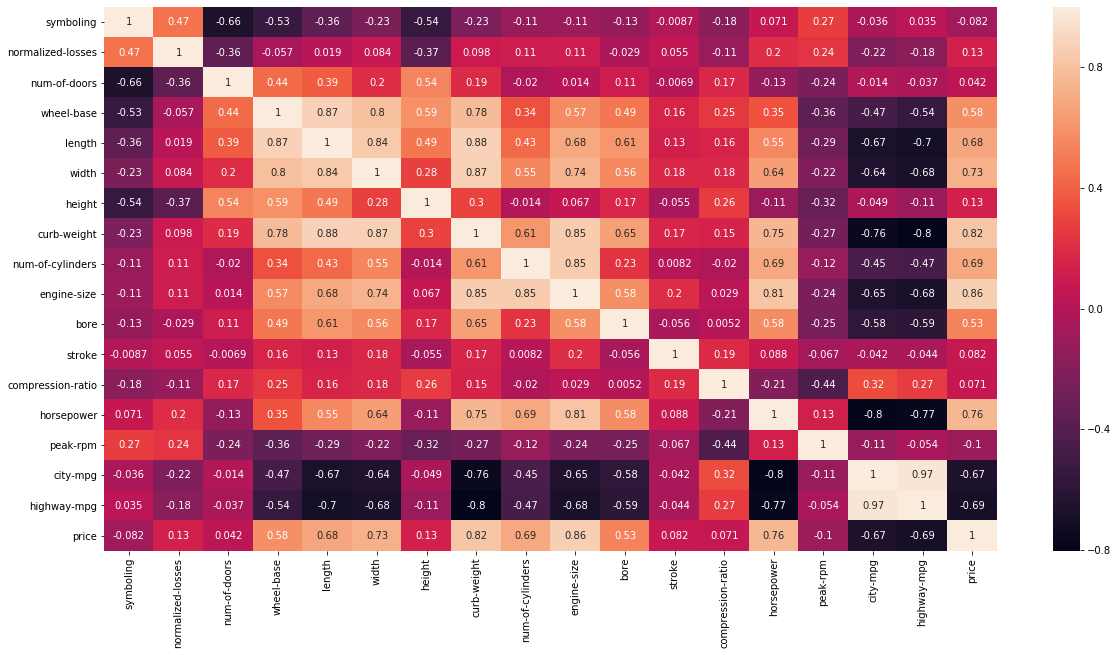

In [120]:
plt.figure(figsize=(20,10))
sns.heatmap(newcardf.corr(),annot=True)

In [121]:
newcardf = newcardf.drop(['width','length','engine-size','highway-mpg','horsepower','wheel-base'], axis=1)

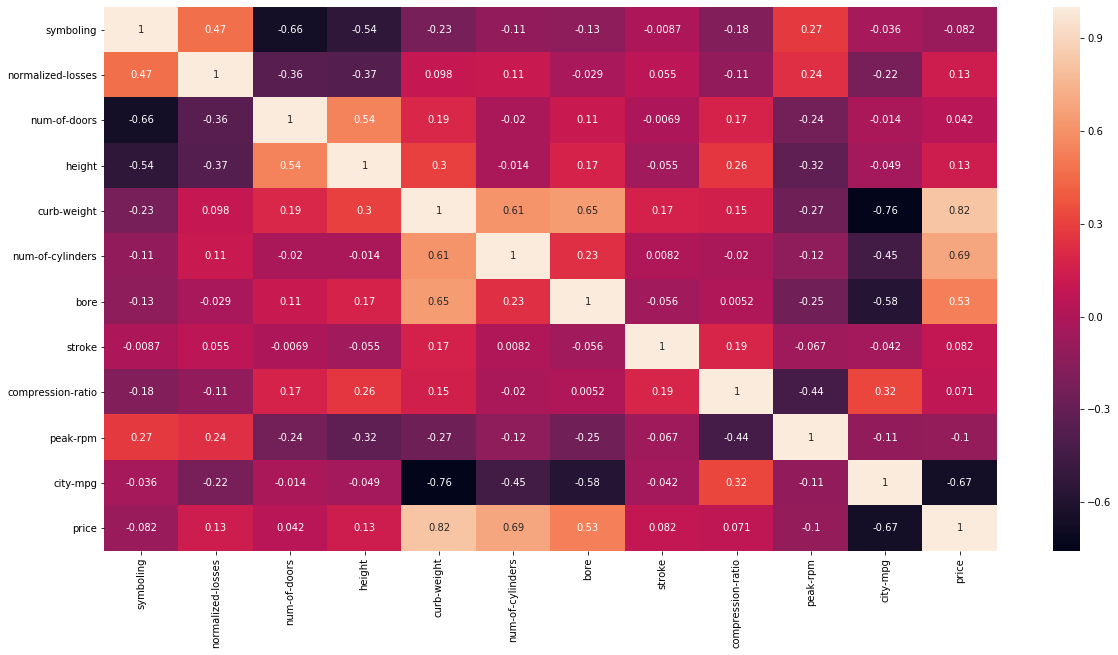

In [122]:
plt.figure(figsize=(20,10))
sns.heatmap(newcardf.corr(),annot=True)

In [123]:
newcardf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null int64
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
peak-rpm             205 non-null float64
city-mpg             205 non-null int64
price                205 non-null float64
dtypes: float64(7), int64(5), object(8)
memory usage: 32.1+ KB


In [124]:
obj_car = newcardf.select_dtypes(include=['object'])
obj_car

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi
5,audi,gas,std,sedan,fwd,front,ohc,mpfi
6,audi,gas,std,sedan,fwd,front,ohc,mpfi
7,audi,gas,std,wagon,fwd,front,ohc,mpfi
8,audi,gas,turbo,sedan,fwd,front,ohc,mpfi
9,audi,gas,turbo,hatchback,4wd,front,ohc,mpfi


In [125]:
encoded_df=pd.get_dummies(obj_car,drop_first=True)
len(encoded_df.columns)

43

In [126]:
enc_car2 = pd.get_dummies(newcardf, columns=['make','fuel-type','aspiration','body-style','drive-wheels',
                                          'engine-location','engine-type','fuel-system'], drop_first=True)

In [127]:
len( enc_car2.columns)

55

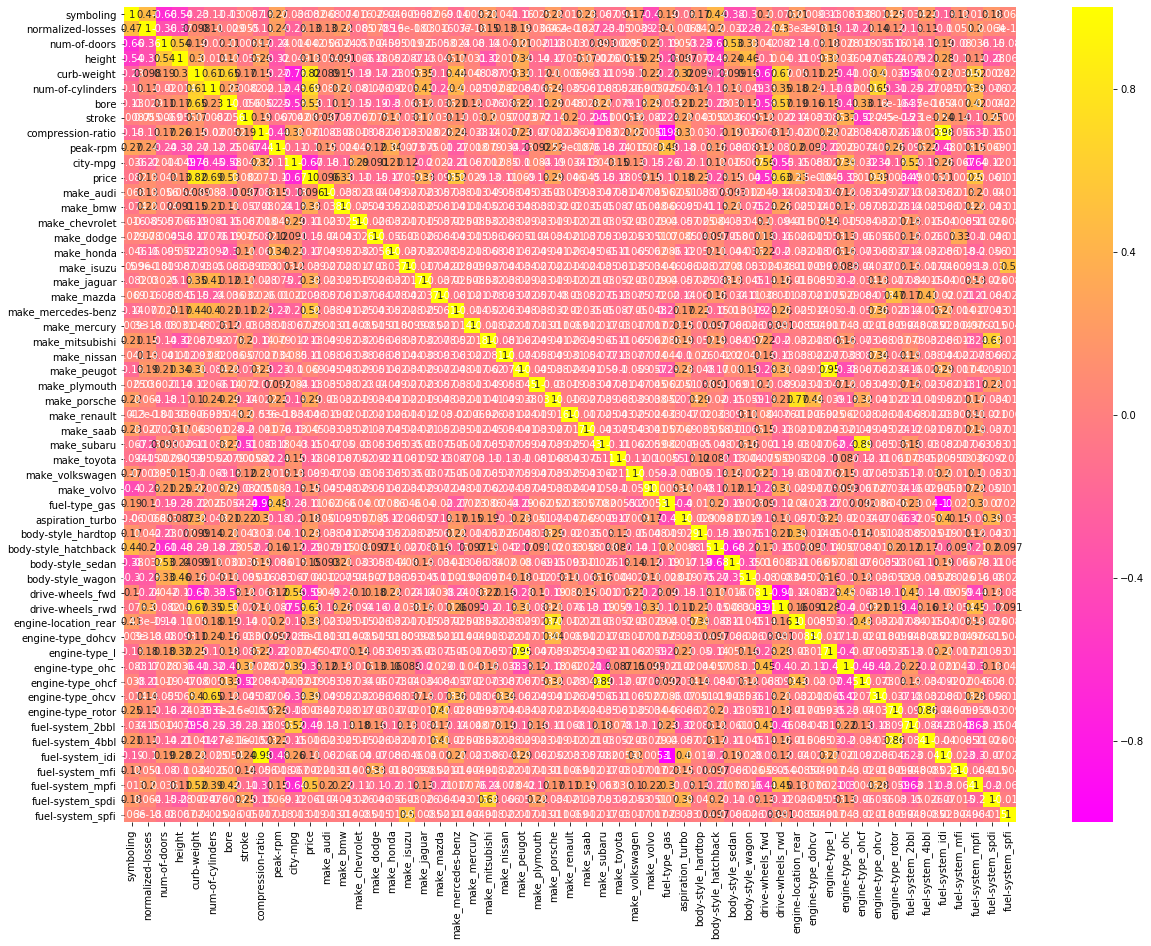

In [128]:
plt.figure(figsize=(20, 15))
sns.heatmap(enc_car2.corr(),annot=True,cmap='spring')

In [129]:
new_car2 = enc_car2.drop(['make_honda','make_peugot','make_porsche','make_subaru',
                         'engine-location_rear','engine-type_l','engine-type_ohcf','engine-type_rotor',
                        'fuel-system_4bbl','fuel-system_idi'], axis=1)

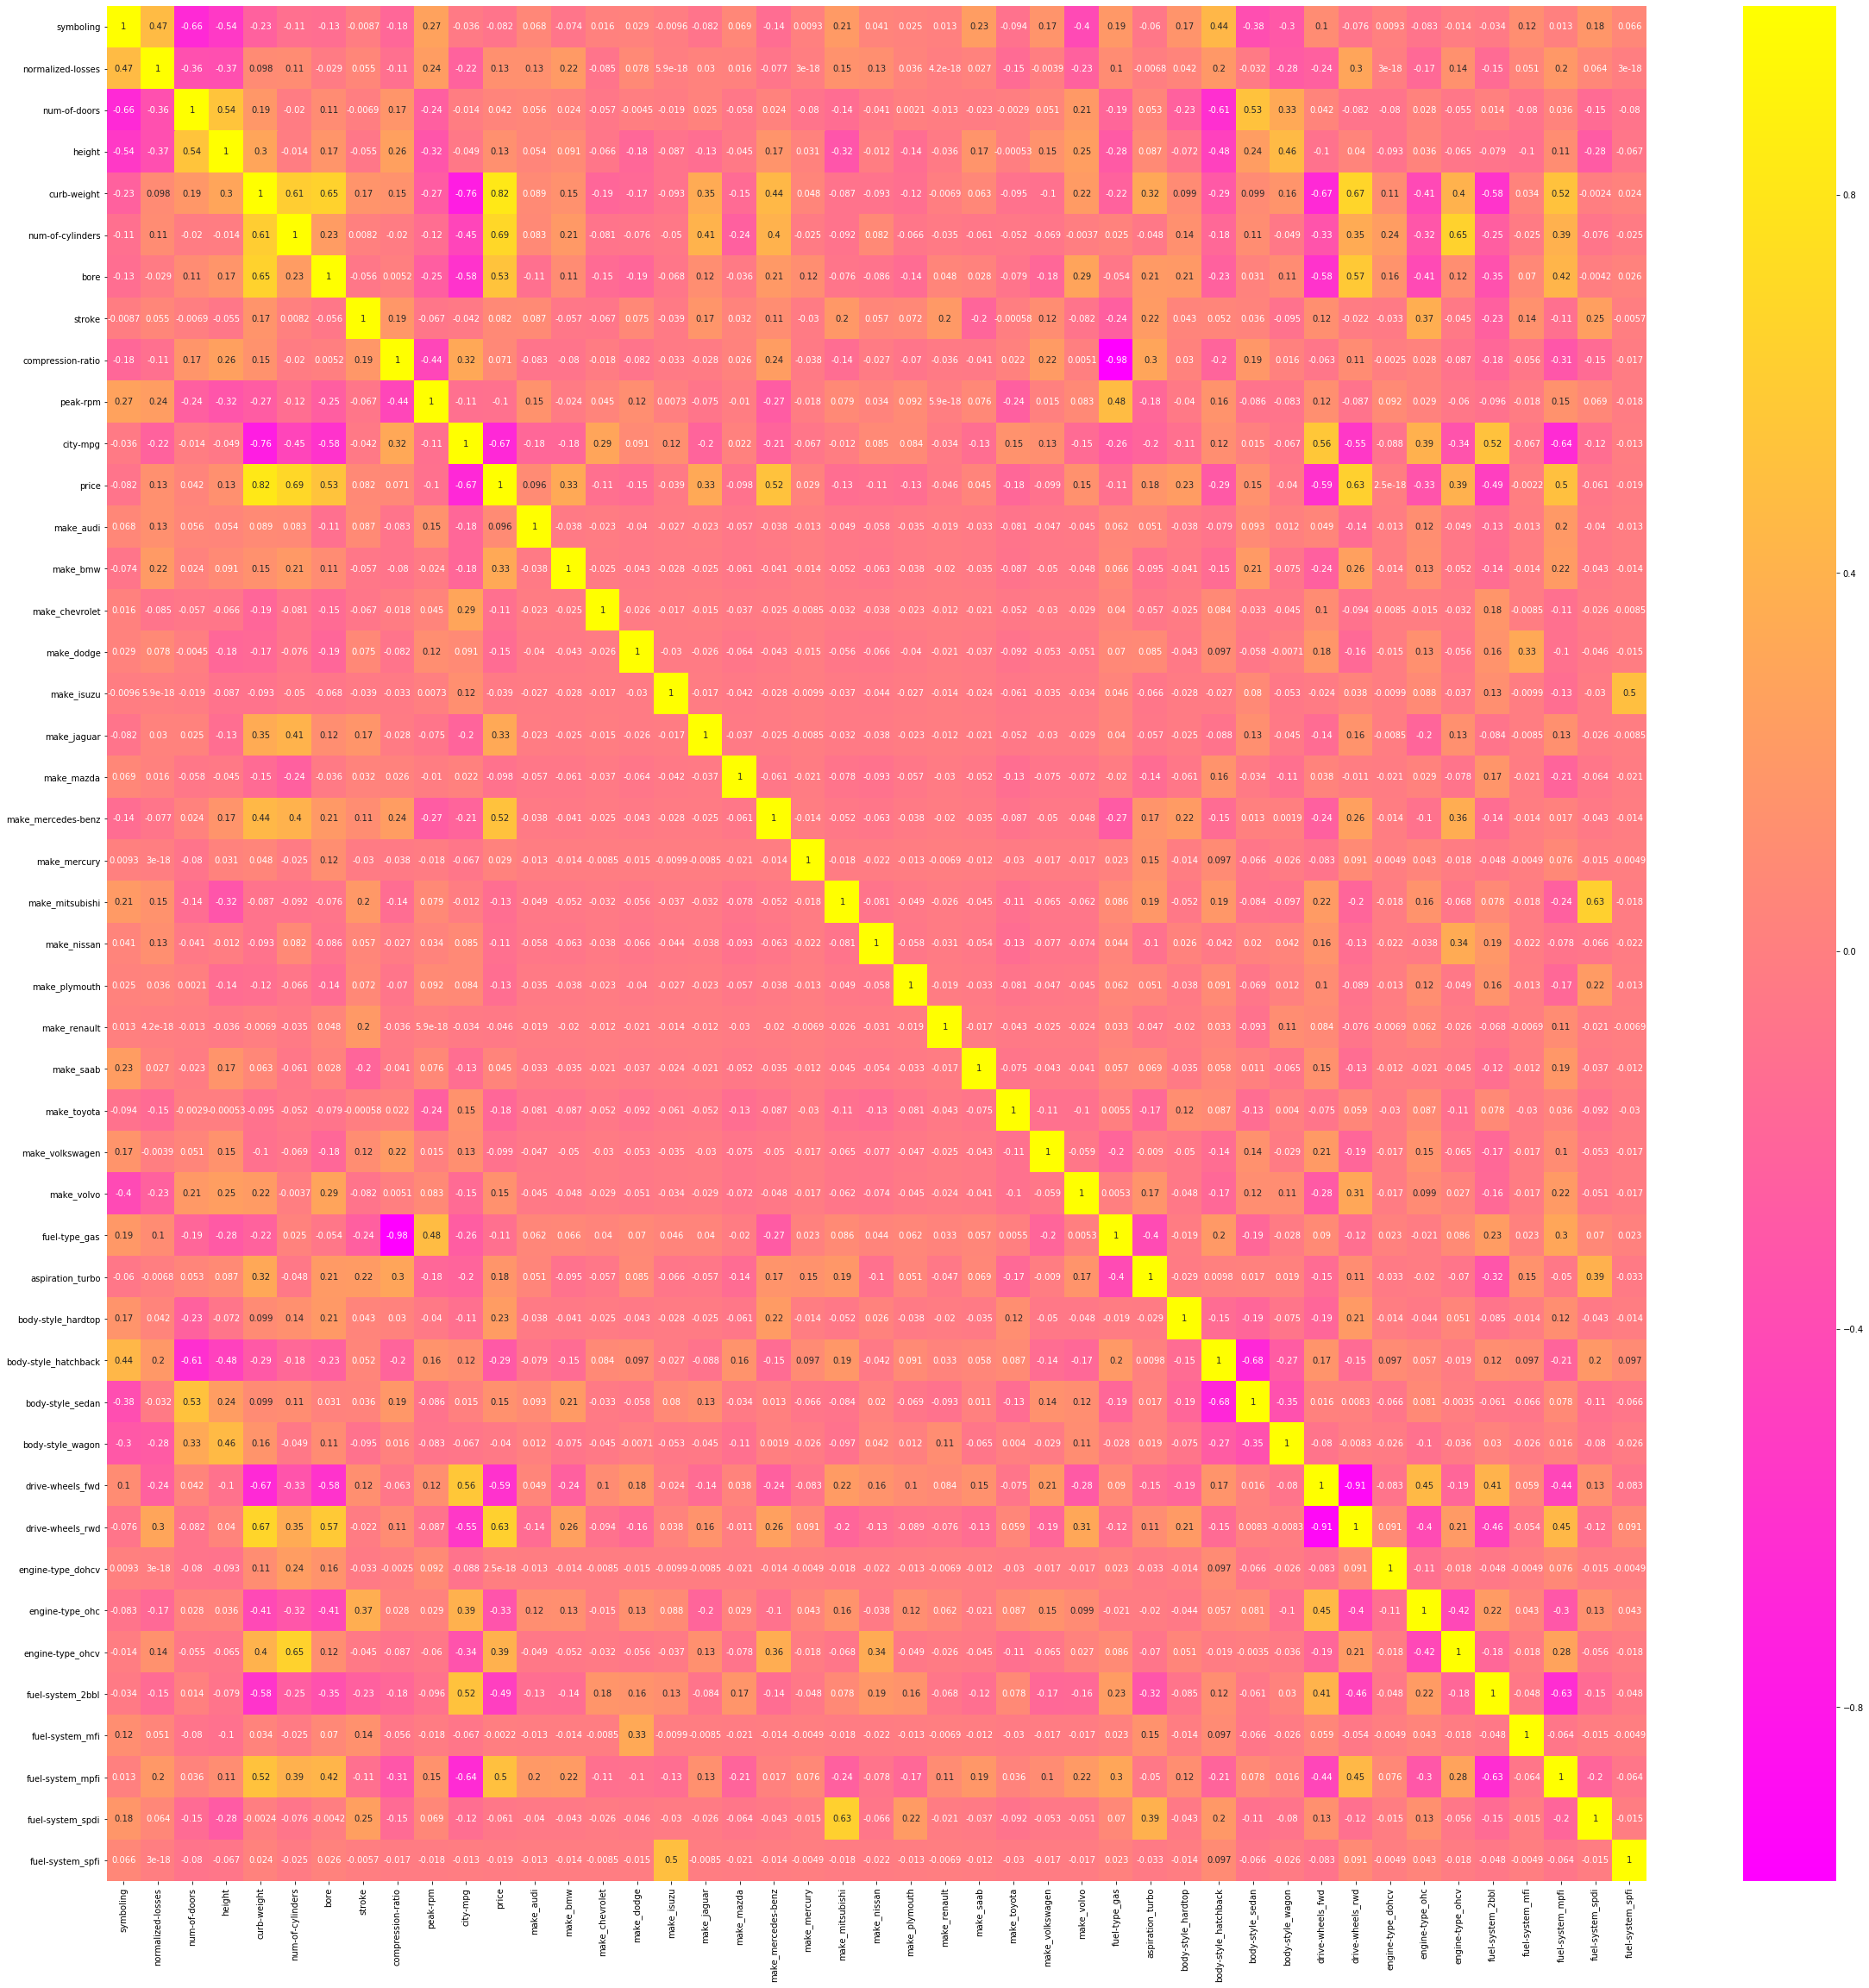

In [130]:
plt.figure(figsize=(40, 40))
sns.heatmap(new_car2.corr(),annot=True,cmap='spring')


In [131]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [132]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(new_car2)

new_car2.head()


,symboling,normalized-losses,num-of-doors,height,curb-weight,num-of-cylinders,bore,stroke,compression-ratio,peak-rpm,...,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohcv,engine-type_ohc,engine-type_ohcv,fuel-system_2bbl,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,2,48.8,2548,4,3.47,2.68,9.0,5000.0,...,0,1,0,0,0,0,0,1,0,0
1,3,122.0,2,48.8,2548,4,3.47,2.68,9.0,5000.0,...,0,1,0,0,0,0,0,1,0,0
2,1,122.0,2,52.4,2823,6,2.68,3.47,9.0,5000.0,...,0,1,0,0,1,0,0,1,0,0
3,2,164.0,4,54.3,2337,4,3.19,3.40,10.0,5500.0,...,1,0,0,1,0,0,0,1,0,0
4,2,164.0,4,54.3,2824,5,3.19,3.40,8.0,5500.0,...,0,0,0,1,0,0,0,1,0,0


In [133]:
norm_car=(new_car2-new_car2.min())/(new_car2.max()-new_car2.min())
norm_car

,symboling,normalized-losses,num-of-doors,height,curb-weight,num-of-cylinders,bore,stroke,compression-ratio,peak-rpm,...,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohcv,engine-type_ohc,engine-type_ohcv,fuel-system_2bbl,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.298429,0.0,0.083333,0.411171,0.2,0.664286,0.290476,0.125000,0.346939,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.298429,0.0,0.083333,0.411171,0.2,0.664286,0.290476,0.125000,0.346939,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.298429,0.0,0.383333,0.517843,0.4,0.100000,0.666667,0.125000,0.346939,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,1.0,0.541667,0.329325,0.2,0.464286,0.633333,0.187500,0.551020,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,1.0,0.541667,0.518231,0.3,0.464286,0.633333,0.062500,0.551020,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.8,0.298429,0.0,0.441667,0.395268,0.3,0.464286,0.633333,0.093750,0.551020,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.6,0.486911,1.0,0.658333,0.525989,0.3,0.464286,0.633333,0.093750,0.551020,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.6,0.298429,1.0,0.658333,0.568658,0.3,0.464286,0.633333,0.093750,0.551020,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.6,0.486911,1.0,0.675000,0.619860,0.3,0.421429,0.633333,0.081250,0.551020,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.4,0.298429,0.0,0.350000,0.607060,0.3,0.421429,0.633333,0.000000,0.551020,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [136]:
train,test=train_test_split(norm_car,test_size=0.3)

In [137]:
train_x = train.drop('price', axis=1)
train_y = train['price']

test_x = test.drop('price', axis=1)
test_y = test['price']

In [139]:
model=LinearRegression()
model.fit(train_x,train_y)
pred_y = model.predict(test_x)

In [140]:

r2_score(test_y,pred_y)

0.6669961252519996